# <font color='darkorange'>Prediction: Simple Linear Regression SLR
---
</font>

*@ Jorge Alberto Tovar Jiménez*

Es un modelo de predicción de variables continuas que utiliza 1 variable independiente para predecir otra variable dependiente.

Problema: Predecir el Co2 emitido por un automóvil tomando como referencia el tamaño del motor.

Librerías:

In [1]:
import pandas as pd
import numpy as np

DataFrame:

In [2]:
df = pd.read_csv('./FuelConsumptionCo2.csv')
print(df.shape)
df.head(3)

(1067, 13)


,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136


Seleccionar datos útiles:

In [3]:
df = df[['ENGINESIZE', 'CO2EMISSIONS']]
df.head(3)

,ENGINESIZE,CO2EMISSIONS
0,2.0,196
1,2.4,221
2,1.5,136


Crear X:

In [4]:
X = df[['ENGINESIZE']].values # [[]]

Crear y:

In [5]:
y = df['CO2EMISSIONS'].values # []

Realizar los Splits:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)
print ('Train set size:', X_train.shape,  y_train.shape)
print ('Test set size: ', X_test.shape,  y_test.shape)

Train set size: (853, 1) (853,)
Test set size:  (214, 1) (214,)


Crear modelo:

In [7]:
from sklearn.linear_model import LinearRegression

modelSLR = LinearRegression()

Entrenar Modelo:

In [8]:
modelSLR.fit(X_train, y_train)

LinearRegression()

Hacer los test:

In [9]:
y_hat = modelSLR.predict(X_test)

Evaluar resultados de los test:

In [10]:
from sklearn.metrics import r2_score

print(f'R2_Score: {round(r2_score(y_test, y_hat),2)*100} %')

R2_Score: 79.0 %


Hacer nuevas predicciones:

In [11]:
p1 = 6.4
p2 = 3.3
p3 = 7.9

pred1 = modelSLR.intercept_ + modelSLR.coef_ * p1
pred2 = modelSLR.intercept_ + modelSLR.coef_ * p2
pred3 = modelSLR.intercept_ + modelSLR.coef_ * p3

print(f'Predicción para tamaño de motor: {p1}\t Co2 = {round(pred1[0],2)}\n')
print(f'Predicción para tamaño de motor: {p2}\t Co2 = {round(pred2[0],2)}\n')
print(f'Predicción para tamaño de motor: {p3}\t Co2 = {round(pred3[0],2)}\n')

Predicción para tamaño de motor: 6.4	 Co2 = 378.66

Predicción para tamaño de motor: 3.3	 Co2 = 255.38

Predicción para tamaño de motor: 7.9	 Co2 = 438.31



Gráfica del modelo:

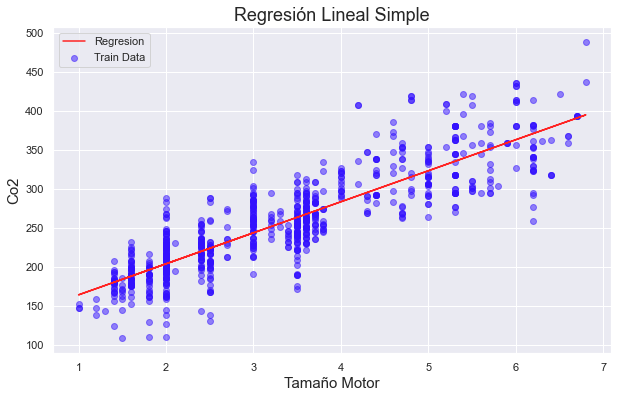

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(10,6))

trainD = plt.scatter(X_train,y_train, color='#31f', alpha=0.5)
regP = plt.plot(X_train, modelSLR.intercept_ + modelSLR.coef_[0]*X_train, color='#f22')
plt.title('Regresión Lineal Simple', fontdict={'size': 18})
plt.xlabel('Tamaño Motor', fontdict={'size': 15})
plt.ylabel('Co2', fontdict={'size': 15})
plt.legend(['Regresion', 'Train Data'])
plt.show();